**Batch_4_
Malicious Query detection using machine learning**

In [ ]:
import glob
import time
import pandas as pd
from nltk import ngrams
from nltk.tokenize import sent_tokenize
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/mageshkumar16/ML/main/SQLiV321.csv')
df.head()


,Sentence,Label
0,""" or pg_sleep ( __TIME__ ) --",1
1,create user name identified by pass123 tempora...,1
2,AND 1 = utl_inaddr.get_host_address ( ...,1
3,select * from users where id = '1' or @ @1 ...,1
4,"select * from users where id = 1 or 1#"" ( ...",1


In [ ]:
df.shape

(44557, 2)

In [ ]:
df.dropna(inplace=True)

**Visualization**

0    25842
1    11342
2     7373
Name: Label, dtype: int64

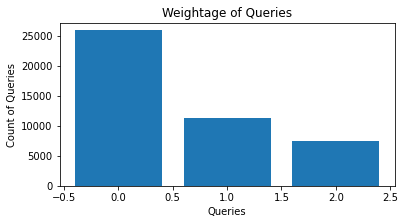

In [ ]:
count=df['Label'].value_counts()
fig = plt.figure(figsize = (6, 3))
plt.bar(count.index,count.values)
plt.xlabel("Queries")
plt.ylabel("Count of Queries")
plt.title("Weightage of Queries")
plt.show
count

**Data Preprocessing**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer( min_df=2, max_df=0.7, stop_words=stopwords.words('english'))
posts = vectorizer.fit_transform(df['Sentence'].values.astype('U')).toarray()

In [ ]:
transformed_posts=pd.DataFrame(posts)
y=df['Label']
y

0        1
1        1
2        1
3        1
4        1
        ..
44552    2
44553    2
44554    2
44555    0
44556    0
Name: Label, Length: 44557, dtype: int64

In [ ]:
one_hot_encoded_data = pd.get_dummies(df, columns = ['Label'])
one_hot_encoded_data.drop(['Sentence'],inplace=True,axis=1)
y=one_hot_encoded_data.values

In [ ]:
y

array([[0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       ...,
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0]], dtype=uint8)

**Traning & Testing**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(transformed_posts, y, test_size=0.2, random_state=42)

In [ ]:
from keras.models import Sequential
from keras import layers
from keras.preprocessing.text import Tokenizer
from keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
input_dim = X_train.shape[1]
model = Sequential()
model.add(layers.Dense(20, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(10,  activation='tanh'))
model.add(layers.Dense(1024, activation='relu'))

model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(3, activation='softmax'))
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                225760    
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 1024)              11264     
                                                                 
 batch_normalization (BatchN  (None, 1024)             4096      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_3 (Dense)             (None, 3)                 3075      
                                                        

In [ ]:
classifier_nn = model.fit(X_train,y_train,
                    epochs=10,
                    verbose=True,
                    validation_split=0.2,
                    batch_size=15)

Epoch 1/10
1902/1902 [==============================] - 14s 7ms/step - loss: 0.1046 - accuracy: 0.9532 - val_loss: 0.0683 - val_accuracy: 0.9715
Epoch 2/10
1902/1902 [==============================] - 12s 6ms/step - loss: 0.0534 - accuracy: 0.9810 - val_loss: 0.0581 - val_accuracy: 0.9750
Epoch 3/10
1902/1902 [==============================] - 12s 6ms/step - loss: 0.0421 - accuracy: 0.9852 - val_loss: 0.0576 - val_accuracy: 0.9745
Epoch 4/10
1902/1902 [==============================] - 12s 6ms/step - loss: 0.0413 - accuracy: 0.9856 - val_loss: 0.0729 - val_accuracy: 0.9677
Epoch 5/10
1902/1902 [==============================] - 12s 6ms/step - loss: 0.0417 - accuracy: 0.9856 - val_loss: 0.0766 - val_accuracy: 0.9683
Epoch 6/10
1902/1902 [==============================] - 12s 6ms/step - loss: 0.0399 - accuracy: 0.9859 - val_loss: 0.0702 - val_accuracy: 0.9676
Epoch 7/10
1902/1902 [==============================] - 12s 7ms/step - loss: 0.0384 - accuracy: 0.9856 - val_loss: 0.0759 - val_ac

**Prediction**

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
for i,row in enumerate(y_pred):
   max_element=max(row)
   for j in range(len(row)):
     if row[j]==max_element:
       row[j]=1
     else:
       row[j]=0


In [ ]:
y_test=y_test.astype('float32')

In [ ]:
y_test

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)

**Classification Report**

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      5133
           1       0.97      0.88      0.92      2308
           2       1.00      1.00      1.00      1471

   micro avg       0.96      0.96      0.96      8912
   macro avg       0.97      0.95      0.96      8912
weighted avg       0.96      0.96      0.96      8912
 samples avg       0.96      0.96      0.96      8912



**HEAT MAP**

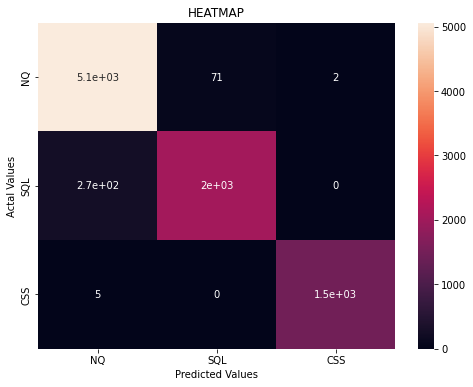

In [ ]:
from sklearn import metrics
import seaborn as sns
cm=metrics.confusion_matrix(y_test.argmax(axis=1),y_pred.argmax(axis=1))
cm_df = pd.DataFrame(cm,
                     index = ['NQ','SQL','CSS'], 
                     columns = ['NQ','SQL','CSS'])
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True)
plt.title('HEATMAP')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

**Database Ping**

In [ ]:
while True:
  URL = "https://mkviews.000webhostapp.com/GetQuery.php"
  r = requests.get(URL)
  soup = BeautifulSoup(r.content, 'html5lib')
  Qry = soup.find(id="Query")
  qy=[]
  qy.append(Qry.text)
  if Qry.text!="0":
      data=pd.DataFrame(qy,columns=['Sent'])
      vectorizee = CountVectorizer()
      poste = vectorizee.fit_transform(data['Sent'].values.astype('U')).toarray()
      z_pred=model.predict(poste)
      for i,row in enumerate(z_pred):
        max_element=max(row)
        for j in range(len(row)):
          if row[j]==max_element:
            row[j]=1
          else:
            row[j]=0
      max_element=max(max(z_pred))
      for i,row in enumerate(max(z_pred)):
          if row==max_element:
            if i==0:
              Q_type="Normal Query"
            elif i==1:
              Q_type="SQL Injection"
            elif i==2:
              Q_type="CSS"
      URL = "https://mkviews.000webhostapp.com/InsertLog.php?qry="+Qry.text+"&type="+Q_type
      r = requests.get(URL)
      soup = BeautifulSoup(r.content, 'html5lib')
      URL = "https://mkviews.000webhostapp.com/TruncateDB.php"
      r = requests.get(URL)
      soup = BeautifulSoup(r.content, 'html5lib')

In [ ]:
model = Sequential()
model.add(layers.Dense(10,  activation='tanh'))
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(3, activation='softmax'))
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
